##  Linear regression with one variable

Now we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

In [1]:
# used for manipulating directory paths
import os

import numpy as np
import pandas as pd 

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
%matplotlib inline
import seaborn as sns

In [2]:
# Read comma separated data

data=pd.read_csv('C:/Users/RANVI/Desktop/Andrew ng/ml-coursera-python-assignments-master/Exercise1/Data/ex1data1.txt',
            delimiter=',',header=None)

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df= data.rename(columns={0:'Population',1:'Profit'})

In [5]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
x=df['Population']

In [7]:
y=df['Profit']

In [8]:
m=y.size # number of training examples

In [9]:
m

97

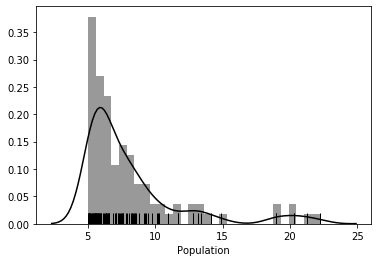

In [10]:
sns.distplot(df['Population'],bins=30,rug=True,color='black')

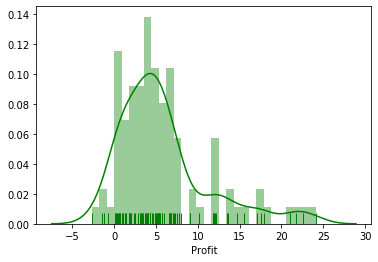

In [11]:
sns.distplot(df['Profit'],bins=30,rug=True,color='g')

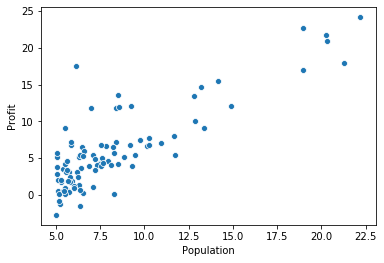

In [12]:
sns.scatterplot(x,y)

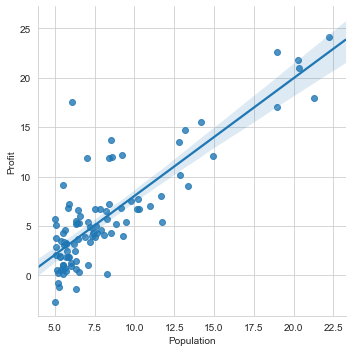

In [13]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Population', y ='Profit', data = df)

In [14]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), x], axis=1)

In [15]:
X.shape

(97, 2)

In [16]:
y.shape

(97,)

In [17]:
m

97

In [18]:
X[:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [19]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Profit, Length: 97, dtype: float64

In [20]:
theta=[0,0]
theta

[0, 0]

In [21]:
def costfunction(X, y,theta):
    
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1/(2*m)*(np.sum(np.square(h-y)))
    return(J)

In [22]:
costfunction(X,y,theta)

32.072733877455676

In [26]:
def gradientDescent(X, y, theta=np.zeros(2), alpha=0.01, iterations=1500):
    m = y.size
    J_old = np.zeros(iterations)
    
    for num in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_old[num] = costfunction(X, y, theta)
    return(theta, J_old)

In [27]:
theta,costFunc =gradientDescent(X,y)

In [28]:
costFunc

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

In [29]:
theta #this is the theta for mminimized cost function

array([-3.63029144,  1.16636235])

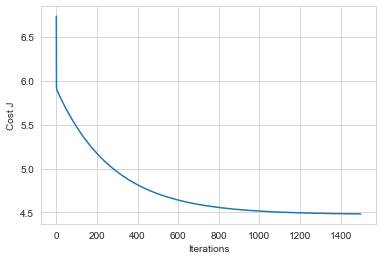

In [30]:
plt.plot(costFunc)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

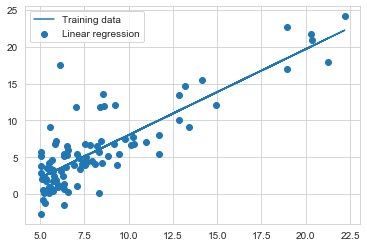

In [34]:
plt.scatter(x, y) #original data

plt.plot(x, np.dot(X, theta)) #trained data

plt.legend(['Training data', 'Linear regression'])

In [45]:
# Predict profit for a city with population of 35000 and 80000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 8])*10000)

4519.7678677017675
57006.07363280296
